# Python важное

#### Встроенные функции [built-in functions](https://docs.python.org/3/library/functions.html#built-in-functions)

In [ ]:
bool_arr = [True, True, False]
num_arr = [1, 2, 3]
print(type(bool_arr))
print(len(bool_arr))
print(all(bool_arr))
print(any(bool_arr))
print(sum(bool_arr))
print(abs(-4))
print(round(5.4))
print(int(-4.))
print(float(5))
zipped = list(zip(bool_arr, num_arr))
print(zipped)
print(list(map(lambda x: (x[0], x[1] ** 2), zipped)))
print(list(filter(lambda x: x[0], zipped)))

<class 'list'>
3
False
True
2
4
5
-4
5.0
[(True, 1), (True, 2), (False, 3)]
[(True, 1), (True, 4), (False, 9)]
[(True, 1), (True, 2)]


#### Comprehensions

[Обсуждение сравнения скорости с обычным for](https://stackoverflow.com/questions/30245397/why-is-a-list-comprehension-so-much-faster-than-appending-to-a-list)

In [ ]:
[(i, j) for i in range(10, 15) if i % 2 == 0 for j in range(0, 5)] # list comprehension

[(10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (12, 0),
 (12, 1),
 (12, 2),
 (12, 3),
 (12, 4),
 (14, 0),
 (14, 1),
 (14, 2),
 (14, 3),
 (14, 4)]

In [ ]:
{x for x in range(2, 50) if all(x % y for y in range(2, min(x, 8)))} # set comprehension

{2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47}

In [ ]:
{key: value for key, value in zip(['a','b','c','d'], [1, 2, 3, 4])} # dict comprehension

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

#### Unpacking

In [ ]:
a, b = 5, 6
print(a, b)
a, b = b, a
print(a, b)

5 6
6 5


In [ ]:
arr = [1, 2, 3]
a, b, c = arr
print(a, b, c)

1 2 3


In [ ]:
[*arr, 100, 200, 300]

[1, 2, 3, 100, 200, 300]

In [ ]:
def my_func(a, b, c):
  return a, b, c

args = [1, 2, 3]
out = my_func(*args)
out

(1, 2, 3)

In [ ]:
x, y, z = my_func(*args)
print(x, y, z)

1 2 3


#### Function arguments

In [ ]:
def func(arg1, *args, name1=None, **kwargs):
  print("arg1:", arg1)
  for i, arg in enumerate(args):
    print(f"arg #{i} in args:", arg)
  print("name1:", name1)
  for i, (key, value) in enumerate(kwargs.items()):
    print(f"arg #{i} in kwargs: ({key}:{value})")

In [ ]:
func(10)

arg1: 10
name1: None


In [ ]:
func(1, name1='my_value')

arg1: 1
name1: my_value


In [ ]:
my_list_args = [10, 20, 30]
my_dict_args = {'a': 1, 'b': 2}
func(1, 2, 3, 4, 5, *my_list_args, abc='qwe', name1='my_value', **my_dict_args)

arg1: 1
arg #0 in args: 2
arg #1 in args: 3
arg #2 in args: 4
arg #3 in args: 5
arg #4 in args: 10
arg #5 in args: 20
arg #6 in args: 30
name1: my_value
arg #0 in kwargs: (abc:qwe)
arg #1 in kwargs: (a:1)
arg #2 in kwargs: (b:2)


#### Классы

In [ ]:
class MyClass:
  static_field = 10

  def __init__(self, data):
    self.data = data

  def __call__(self):
    print("This object is callable!")

  def my_func(self):
    print(f'Your data is: `{self.data}`')

In [ ]:
cls = MyClass("some data")
cls.data

'some data'

In [ ]:
cls.my_func()

Your data is: `some data`


In [ ]:
MyClass.my_func(cls)

Your data is: `some data`


In [ ]:
cls()

This object is callable!


In [ ]:
MyClass.static_field

10

#### Важно: значения передаются "по ссылке"

In [ ]:
def func(a: list):
  print("in func before:", a)
  a.append(1)
  print("in func after:", a)

my_list = ["asd", 4, 5.5]
print("my_list init:", my_list)

func(my_list)
print("my_list after func:", my_list)

my_list init: ['asd', 4, 5.5]
in func before: ['asd', 4, 5.5]
in func after: ['asd', 4, 5.5, 1]
my_list after func: ['asd', 4, 5.5, 1]


#### Важно: в Python есть типы, хотя часто их нигде не указывают

In [ ]:
a = 5
print(type(a))

b = 5.5
print(type(b))

c = "abc"
print(type(c))

print(type([1,2,3]))

<class 'int'>
<class 'float'>
<class 'str'>
<class 'list'>


In [ ]:
a = 5
print(type(a))

a = 5.0
print(type(a))

a = 5+0j
print(type(a))

<class 'int'>
<class 'float'>
<class 'complex'>


#### Важно: list и tuple

**_Немного про List_**

В Python структура данных list реализована как динамический массив. Это означает, что элементы списка хранятся в непрерывном блоке памяти, и при добавлении новых элементов (например, с помощью метода append) может происходить перераспределение памяти, если текущий размер массива становится недостаточным.

1) Динамический размер: Списки могут изменять свой размер по мере добавления или удаления элементов. Когда список заполняется, Python автоматически выделяет больше памяти, чтобы разместить дополнительные элементы.

2) Произвольный доступ: Элементы списка могут быть доступны по индексу, что позволяет быстро получать доступ к элементам (время доступа O(1)).

3) Гетерогенность: Списки могут содержать элементы разных типов, включая другие списки, что позволяет создавать сложные структуры данных.

4) Вставка и удаление: Вставка и удаление элементов в середину списка может быть менее эффективной, чем в конце, так как требует сдвига элементов (время O(n) в худшем случае).

In [ ]:
a = [1,2,3]
b = (1,2,3)
print(a)
print(b)
# В чем разница?

[1, 2, 3]
(1, 2, 3)


In [ ]:
a.append(10)
a

[1, 2, 3, 10]

In [ ]:
b.append(10)

AttributeError: 'tuple' object has no attribute 'append'

In [ ]:
# Лист из одного элемента
a = [1]
a

[1]

In [ ]:
# Как создать tuple из одного элемента?
a = (1,) # Просто (1) без запятой - неправильно!!
a

(1,)

In [ ]:
# При этом:
a = (1, 2,) # Последняя запятая уже игнорируется! (но это очень удобно при создании многострочных данных)
a

(1, 2)

In [ ]:
# Tuple можно создать и без скобочек!
a = 1, 2
a

(1, 2)

In [ ]:
# Tuple можно создать и без скобочек!
a = 1, 2,
a

(1, 2)

#Numpy basics

[Numpy quickstart tutorial](https://numpy.org/doc/stable/user/quickstart.html)

In [ ]:
!pip install numpy

In [3]:
import numpy as np

#### Создание примитивных массивов

**_Как это устроено изнутри?_**

Под капотом np.array() лежит такая структура данных как массив.

1) Фиксированный размер: Размер массива определяется при создании и обычно не может изменяться без выделения новой области памяти.

2) Непрерывное размещение в памяти: Элементы массива располагаются последовательно в одной области памяти, что обеспечивает быстрый доступ к каждому элементу. Память для np.array выделяется в куче

3) Индексирование и получение элементов за О(1)

4) В np.array можно положить данные разных типов, но с определёнными оговорками. Когда вы создаете массив NumPy с элементами разных типов, NumPy автоматически приводит все элементы к одному общему типу, чтобы обеспечить однородность массива. Это может привести к тому, что некоторые данные будут преобразованы или потеряны.



In [4]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
a

array([11, 22, 33, 44, 55, 66, 77, 88, 99])

In [ ]:
type(a)

numpy.ndarray

In [ ]:
a.shape

(9,)

In [ ]:
a = a.reshape(3, 3)
a

array([[11, 22, 33],
       [44, 55, 66],
       [77, 88, 99]])

In [ ]:
print(a.ndim)
print(a.shape)
print(a.size)

2
(3, 3)
9


In [ ]:
np.zeros((3, 3), dtype=np.float64)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
c = np.zeros_like(a)
print(c.shape)
c

(3, 3)


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
np.ones((3,3), dtype=bool)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
np.diag(np.array([1, 2, 3, 4]))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [ ]:
np.random.randn(10, 2)

array([[-0.06399853, -1.40191423],
       [ 0.41178978, -0.6712465 ],
       [-0.14446665,  0.2057586 ],
       [ 1.23089899,  0.42145285],
       [-0.47117869, -1.74080149],
       [-1.12235652,  0.85818052],
       [ 1.75236137, -0.68240871],
       [-0.29402321,  0.18614691],
       [-1.07340839,  0.11569536],
       [ 0.33306352,  0.16162795]])

In [ ]:
np.random.randint(0, 15, size=(2, 3, 4))

array([[[ 8, 14, 14, 14],
        [ 4,  2,  7,  6],
        [ 7, 14,  2,  9]],

       [[ 2,  5, 13,  4],
        [ 4,  7,  0, 10],
        [ 1, 11,  4,  4]]])

#### Генерация массивов

In [ ]:
np.arange(10)    #  От 0 до указанного числа не включительно

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(10, 20)    #  Диапазон

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
np.arange(20, 100, 10)    #  Диапазон с заданным шагом

array([20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
np.arange(0, 1, 0.1)    #  Аргументы могут иметь тип float

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
np.linspace(0, 1, 11)    # Указать кол-во элементов

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

#### Индексация (https://numpy.org/doc/stable/user/basics.indexing.html)

In [6]:
a = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99])
lst = a.tolist()
lst

[11, 22, 33, 44, 55, 66, 77, 88, 99]

In [7]:
print(a[2])
print(lst[2])

33
33


In [8]:
print(a[-2])
print(lst[-2])

88
88


In [13]:
print(a[0:4])
print(lst[0:4])

[11 22 33 44]
[11, 22, 33, 44]


In [14]:
print(a[0:4:2])
print(lst[0:4:2])

[11 33]
[11, 33]


In [15]:
lst > 50

TypeError: '>' not supported between instances of 'list' and 'int'

In [16]:
a > 50

array([False, False, False, False,  True,  True,  True,  True,  True])

In [17]:
a[a > 50] # фильтрация по условию (в реальности по маске)

array([55, 66, 77, 88, 99])

На заметку: [Битовые операции в python](https://docs.python.org/3/library/stdtypes.html#bitwise-operations-on-integer-types)

In [18]:
print((a > 50) & (a < 70))
print((a > 50) and (a < 70)) # Не сработает! Потому что между `np.array` не определена операция `and`

[False False False False  True  True False False False]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
a[(a > 50) & (a < 70)]

array([55, 66])

In [20]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [21]:
a = a.reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
a.reshape(4, 2) # Error!

ValueError: cannot reshape array of size 12 into shape (4,2)

In [22]:
a = a.reshape(4, -1)
print(a.shape)
a

(4, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [23]:
print(a[0][2])
print(a[0, 2]) # то же самое, но работает быстрее, т.к. не создается промежуточный массив

2
2


In [25]:
print(a[:2][1])
print(a[:2, 1])

[3 4 5]
[1 4]


In [26]:
print(a)
print("=" * 20)
print(a[[0, 2]]) # список задает индексы первой размерности, по которым нужно взять объекты
print()
print(a[(0, 2)]) # кортеж превращается в dimensional index matching
print()
print(a[:3, 2])
print(a[(slice(0, 3), 2)])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[0 1 2]
 [6 7 8]]

2

[2 5 8]
[2 5 8]


In [27]:
print(a.shape)

(4, 3)


In [28]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [29]:
a[..., None].shape

(4, 3, 1)

In [30]:
a[None, :, :]

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]])

In [31]:
print(a.shape)
a_unsqueezed = a[None, :]
print(a_unsqueezed)
print(a_unsqueezed.shape)
print(a[:, np.newaxis, :].shape)
print(np.newaxis is None)

(4, 3)
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]]
(1, 4, 3)
(4, 1, 3)
True


In [32]:
print(a[None, :, None, :].shape)
print(a[None, :, None, :].squeeze().shape)

(1, 4, 1, 3)
(4, 3)


#### Работа с размерностями

In [33]:
a = np.arange(10).reshape(2, 5)
print(a.shape)
a

(2, 5)


array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [34]:
print(a.T.shape)
a.T

(5, 2)


array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [35]:
a = np.arange(24).reshape(2, 3, 4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [36]:
np.swapaxes(a, 1, 2)

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

In [37]:
np.transpose(a, (2, 0, 1))

array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

#### Популярные операции

In [40]:
x = np.arange(10).reshape(2, 5)
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [41]:
# Арифметические операции - поэлементные
print(x + 5)
print(x * 5)
print(x / 5)
print(x ** 5)
print(x == 5)
print(np.cos(x))

[[ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10 15 20]
 [25 30 35 40 45]]
[[0.  0.2 0.4 0.6 0.8]
 [1.  1.2 1.4 1.6 1.8]]
[[    0     1    32   243  1024]
 [ 3125  7776 16807 32768 59049]]
[[False False False False False]
 [ True False False False False]]
[[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362]
 [ 0.28366219  0.96017029  0.75390225 -0.14550003 -0.91113026]]


In [42]:
a = 5 * np.ones((5, 5))
b = np.eye(5) + 1
print(a, '\n')
print(b)

[[5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]] 

[[2. 1. 1. 1. 1.]
 [1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 1.]
 [1. 1. 1. 2. 1.]
 [1. 1. 1. 1. 2.]]


In [43]:
print(a * b, '\n') # поэлементное умножение
print(a @ b, '\n') # матричное умножение
print(a.dot(b)) # эта операция может применяться только для np.ndarray, а операция выше нет

[[10.  5.  5.  5.  5.]
 [ 5. 10.  5.  5.  5.]
 [ 5.  5. 10.  5.  5.]
 [ 5.  5.  5. 10.  5.]
 [ 5.  5.  5.  5. 10.]] 

[[30. 30. 30. 30. 30.]
 [30. 30. 30. 30. 30.]
 [30. 30. 30. 30. 30.]
 [30. 30. 30. 30. 30.]
 [30. 30. 30. 30. 30.]] 

[[30. 30. 30. 30. 30.]
 [30. 30. 30. 30. 30.]
 [30. 30. 30. 30. 30.]
 [30. 30. 30. 30. 30.]
 [30. 30. 30. 30. 30.]]


In [ ]:
x = np.arange(4).reshape(2,2)
w = np.arange(8).reshape(2,4)
print(x)
print(w)

[[0 1]
 [2 3]]
[[0 1 2 3]
 [4 5 6 7]]


In [ ]:
x @ w

array([[ 4,  5,  6,  7],
       [12, 17, 22, 27]])

In [ ]:
np.random.seed(1)

In [ ]:
a = np.random.randint(0, 15, size=(4, 6, 3))
a

array([[[ 5, 11, 12],
        [ 8,  9, 11],
        [ 5,  0,  0],
        [ 1, 12,  7],
        [13, 12,  6],
        [ 9,  2,  4]],

       [[14,  5,  2],
        [ 4, 11, 12],
        [10, 12, 13],
        [14,  2,  4],
        [ 7,  7,  9],
        [ 1,  7, 14]],

       [[ 0,  6, 13],
        [ 9,  9,  7],
        [13,  6,  9],
        [ 1,  0, 12],
        [ 1,  8,  8],
        [13,  3, 10]],

       [[ 9,  8, 14],
        [ 7,  3,  6],
        [ 5,  1,  9],
        [ 3,  4,  8],
        [ 1, 11, 12],
        [10,  4,  0]]])

In [ ]:
res = a.min(axis=0) # a.shape == (4, 6, 3) -> res.shape == (6, 3)
print(res)
# res[i][j] == min(a[0][i][j], a[1][i][j], a[2][i][j], a[3][i][j])
print(res[0][1])
print(a[:4, 0, 1])

[[0 5 2]
 [4 3 6]
 [5 0 0]
 [1 0 4]
 [1 7 6]
 [1 2 0]]
5
[11  5  6  8]


In [ ]:
a.min(axis=1)

array([[1, 0, 0],
       [1, 2, 2],
       [0, 0, 7],
       [1, 1, 0]])

In [ ]:
print(a.min())
print(a.max())
print(a.sum())
print(a.mean())

0
518
7.194444444444445


#### Присваивание значений

In [ ]:
x = np.array([1,2,3,4,5])
x[-1] = 20
x[:2] = 10
x

array([10, 10,  3,  4, 20])

In [ ]:
x = np.array([1,2,3,4,5])
x[[0, 1, 4]] += 10
x

array([11, 12,  3,  4, 15])

In [ ]:
x = np.array([1,2,3,4,5])
x[[0, 1, 4, 0]] += 10 # По 0 индексу 10 НЕ добавится дважды из-за буферизации!
x

array([11, 12,  3,  4, 15])

In [ ]:
x = np.array([1,2,3,4,5])
np.add.at(x, [0, 1, 4, 0], 10) # По 0 индексу 10 добавится дважды
x

array([21, 12,  3,  4, 15])

#### Примитивное сравнение скорости работы с for-loop

In [44]:
CNT = 100000

In [45]:
%%timeit
ans = 0
for i in range(CNT):
  ans += (i / 40) ** 2
ans / CNT

16.9 ms ± 3.18 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [46]:
%%timeit
sum([(i / 40) ** 2 for i in range(CNT)]) / CNT

17.5 ms ± 4.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Первый код работает быстрее по причине того, что тут не выделяется память на поддерживание массива и работу с ним, а во втором наоборот

In [ ]:
%%timeit
arr = np.arange(CNT, dtype=float)
arr /= 40
arr = arr ** 2
arr.mean()

278 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
((np.arange(CNT, dtype=float) / 40) ** 2).mean()

254 µs ± 9.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Второй вариант быстрее так, как мы не создаем другие массивы и изменяем их как в первом варике, а создаем изменяем один и тот же

#### Сортировка

In [ ]:
a = np.array([1, 5, 6, 10, -2, 0, 18])

In [ ]:
# Not inplace
print(np.sort(a))
print(a)

[-2  0  1  5  6 10 18]
[ 1  5  6 10 -2  0 18]


In [ ]:
# Inplace
a.sort()
print(a)

[-2  0  1  5  6 10 18]


#### Объединение массивов

In [ ]:
a = np.arange(4)

In [ ]:
b = np.ones(5)
b

array([1., 1., 1., 1., 1.])

In [ ]:
c = np.hstack((a, b, 5 * b))
c

array([0., 1., 2., 3., 1., 1., 1., 1., 1., 5., 5., 5., 5., 5.])

In [ ]:
np.vstack((a, np.random.randn(*a.shape), np.random.randn(*a.shape)))

array([[ 0.        ,  1.        ,  2.        ,  3.        ],
       [ 0.05680477, -0.95362083, -0.24479503,  0.50499744],
       [-2.09809036, -1.36782917, -1.36009438, -0.03267816]])

#### Broadcasting (https://numpy.org/doc/stable/user/basics.broadcasting.html)


Бродкастинг (broadcasting) в Python относится к механизму, позволяющему выполнять операции над массивами разной формы, автоматически подстраивая их размеры для соответствия друг другу.

Например, если у вас есть массив размером 3x4 и вы хотите добавить к каждой строке этого массива одно и то же число, вместо того чтобы вручную повторять это число для каждого элемента, механизм бродкастинга сделает это за вас автоматически.

Правило бродкастинга для поэлементных арифметических операций:

Дополняем единичными размерностями меньший массив так, чтобы кол-во размерностей совпадало.

Сравниваем поэлементно размерности.

Размерности совместимы, если:

a) Они равны
или
b) Одна из них равна 1

In [49]:
a = np.arange(90).reshape(6, 5, 1, 3, 1)
b = np.arange(8).reshape(4, 1, 2)
(a * b).shape

(6, 5, 4, 3, 2)

In [50]:
a = np.array([5, 10])
b = np.array([[1, 2],
              [3, 4],
              [5, 6],
              [7, 8]])
print(a.shape)
print(b.shape)
a + b

(2,)
(4, 2)


array([[ 6, 12],
       [ 8, 14],
       [10, 16],
       [12, 18]])

#### Dtypes

In [ ]:
a = np.array([1,2,3])
a.dtype

dtype('int64')

In [ ]:
x = np.array(["123","21243"])
x

array(['123', '21243'], dtype='<U5')

In [ ]:
x = np.array([1, "2", None])
x

array([1, '2', None], dtype=object)

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
x.dtype

dtype('float64')

In [ ]:
x = np.array([-10, 50, 100, 200, 255], dtype=np.uint8)
x

array([246,  50, 100, 200, 255], dtype=uint8)

In [ ]:
x += 1
x

array([247,  51, 101, 201,   0], dtype=uint8)

# Производная линейного слоя

Пусть есть функция $y(X) = X * W$, где $X$ - матрица размера $[m,n]$, а $W$ - матрица размера $[n, k]$.

Чему равна производная $\dfrac{\partial{y}}{\partial{X}}$?

Заметим, что мы пытаемся найти производную по матрице, поэтому и результатом будет тоже матрица (причем такого же размера как и $X$)

Вспомним формулу перемножения матриц:
$$c_{ij}=\sum_{r=0}^{n} x_{ir} \cdot w_{rj}$$

Значит, $$\dfrac{\partial{y}}{\partial{X_{ir}}} = \sum_{j=0}^{k} w_{rj} = w[r,:].sum()$$

Это означает, что, например, производная любого элемента первого столба иксов равна сумме значений в первой строке матрицы $W$.

Т.е., например, для $m = 3$, $n = 2$, $k = 4$

$X = \left[
 \begin{matrix}
   1 & 2 \\
   3 & 4 \\
   5 & 6 \\
  \end{matrix}
\right]$

$W = \left[
 \begin{matrix}
   1 & 2 & 3 & 4\\
   5 & 6 & 7 & 8\\
  \end{matrix}
\right]$

$\dfrac{\partial{y}}{\partial{X}} = \left[
 \begin{matrix}
   10 & 26 \\
   10 & 26 \\
   10 & 26 \\
  \end{matrix}
\right] = \left[
 \begin{matrix}
   1 & 1 & 1 & 1\\
   1 & 1 & 1 & 1\\
   1 & 1 & 1 & 1\\
  \end{matrix}
\right]_{m * k} * W^T$

Найдем теперь производную по $W$: $$\dfrac{\partial{y}}{\partial{W_{rj}}} = \sum_{i=0}^{m} x_{ir} = x[:,r].sum()$$

$\dfrac{\partial{y}}{\partial{W}} = \left[
 \begin{matrix}
   9  & 9  & 9  & 9\\
   12 & 12 & 12 & 12\\
  \end{matrix}
\right] = X^T * \left[
 \begin{matrix}
   1 & 1 & 1 & 1\\
   1 & 1 & 1 & 1\\
   1 & 1 & 1 & 1\\
  \end{matrix}
\right]_{m * k}$

In [ ]:
m, n, k = 3, 2, 4
X_shape = (m , n)
W_shape = (n, k)

X = np.arange(np.prod(X_shape)).reshape(X_shape) + 1
W = np.arange(np.prod(W_shape)).reshape(W_shape) + 1
print(X)
print(W)

[[1 2]
 [3 4]
 [5 6]]
[[1 2 3 4]
 [5 6 7 8]]


In [ ]:
ones_grad_shape = (m, k)
ones_grad = np.ones(np.prod(ones_grad_shape)).reshape(ones_grad_shape)
ones_grad

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
print(ones_grad @ W.T)

[[10. 26.]
 [10. 26.]
 [10. 26.]]


In [ ]:
print(X.T @ ones_grad)

[[ 9.  9.  9.  9.]
 [12. 12. 12. 12.]]


#### check

In [ ]:
m, n, k = 5, 3, 1
X_shape = (m , n)
W_shape = (n, k)
Z_shape = (m, k)

X = np.arange(np.prod(X_shape)).reshape(X_shape) + 1
W = np.arange(np.prod(W_shape)).reshape(W_shape) + 1
Z = np.arange(np.prod(Z_shape)).reshape(Z_shape) + 1
print(X)
print(W)
print(Z)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]
[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]
 [4]
 [5]]


In [ ]:
ones_grad_shape = (m, k)
ones_grad = np.ones(np.prod(ones_grad_shape)).reshape(ones_grad_shape)
ones_grad

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
q1 = X.T @ ones_grad @ Z.T
q1

array([[ 35.,  70., 105., 140., 175.],
       [ 40.,  80., 120., 160., 200.],
       [ 45.,  90., 135., 180., 225.]])

In [ ]:
Z.shape

(5, 1)

In [ ]:
X.shape

(5, 3)

In [ ]:
Z, Z.repeat(m, 1)

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5]]))

In [ ]:
q2 = X.T @ Z.repeat(m, 1).T
q2

array([[ 35,  70, 105, 140, 175],
       [ 40,  80, 120, 160, 200],
       [ 45,  90, 135, 180, 225]])

#Регрессия на NumPy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Генерация датасета

In [ ]:
np.random.seed(1)

N = 500 # Размер датасета

X = np.random.random((N, 2)) * 4 - 2 # N пар значений от (-2, +2)

Y = X[:, 0] * X[:, 1] * 1.5 # Формируем седловую функцию, эта функция в реальной жизни нам неизвестна

# X    - входные данные
# Y    - целевая переменная
# Ypred - предсказанное значение

In [ ]:
X[:5,0]

array([-0.33191198, -1.9995425 , -1.41297644, -1.25495915, -0.4129301 ])

In [ ]:
X[:5,1]

array([ 0.88129797, -0.79066971, -1.63064562, -0.61775709,  0.15526694])

In [ ]:
X[:5,0] * X[:5,1]

array([-0.29251336,  1.58097769,  2.30406384,  0.77525992, -0.06411439])

### Визуализация датасета

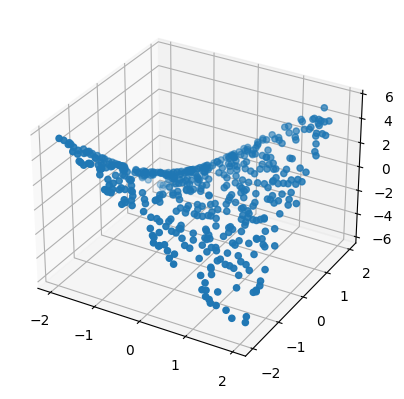

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

## Создаем нейронную сеть и обучаем её

### Инициализация оптимизируемых параметров (весов)

In [ ]:
D = 2 # Размер входа
M = 100 # Количество скрытых нейронов

# Оптимизируемые веса:

# Первый линейный слой
W1 = np.random.randn(D, M) / np.sqrt(D) # Первая матрица весов
# W.shape == (2, 100)
b1 = np.zeros(M) # Вектор сдвига (bias)
# b.shape == (100,)

# Второй линейный слой
W2 = np.random.randn(M) / np.sqrt(M) # Вторая матрица весов
# W2.shape == (100,)
b2 = 0 # Вектор сдвига (bias)

### Forward функция

In [ ]:
# предсказывает по входу целевое значение
def forward(X, W1, b1, W2, b2):
  Z = X @ W1 + b1 # Прогнали через первый слой
  # Z.shape == (500, 100)
  Z_act = Z * (Z > 0) # Применим функцию активации ReLU
  # Z_act.shape == (500, 100)

  Ypred = Z_act @ W2 + b2 # Прогоняем через второй слой
  # (500, 100) @ (100, ) -> (500, )
  return Z_act, Ypred

### Функция потери

In [ ]:
def calc_loss(Y, Ypred):
  return ((Y - Ypred) ** 2).mean() # Считаем функцию MSE

In [ ]:
# Посчитаем потерю перед обучением
z, Ypred = forward(X, W1, b1, W2, b2)
print(Ypred.shape)
loss = calc_loss(Y, Ypred)
loss

(500,)


5.498455466538703

### Классический градиентный спуск

Для применения градиентного спуска, мы должны знать, на сколько нужно изменить веса. Производная (градиент) функции потерь (ФП) по весу показывает направление роста функции потери. Т.к. мы хотим значение ФП уменьшать, то должны делать сдвиг веса в противоположную сторону. Коэффициент `lr` будет определять, насколько сильное изменение мы хотим сделать.

Таким образом, обновление веса происходит по формуле:
$W_{new} = W_{old} - lr \cdot grad_{W_{old}}$, где $grad_{W_{old}} = \dfrac{\partial{Loss}}{\partial{W_{old}}}$

### Производные для обновления весов

Рассмотрим функцию `forward` как последовательное применение функций.

Т.е. $Y_{pred} = forward(X) = f_k(f_{k-1}(...f_3(f_2(f_1(X)))))$

$Loss$ - функция потери, принимающая на вход $Y_{true}$ и $Y_{pred}$. В нашем случае $Loss = MSE(Y_{true}, Y_{pred})$

Попробуем найти в общем случае $grad_{X} = \dfrac{\partial{Loss}}{\partial{X}}$.

Вспомним про цепное правило:
$$\dfrac{\partial{Loss}}{\partial{X}} = \dfrac{\partial{Loss}}{\partial{f_x}} * \dfrac{\partial{f_x}}{\partial{X}}$$

Если идти с конца, то получится:
$$\dfrac{\partial{Loss}}{\partial{X}} = \dfrac{\partial{Loss}}{\partial{f_k}} * \dfrac{\partial{f_k}}{\partial{X}}$$
$$\dfrac{\partial{Loss}}{\partial{X}} = \dfrac{\partial{Loss}}{\partial{f_k}} * \dfrac{\partial{f_k}}{\partial{f_{k-1}}} * \dfrac{\partial{f_{k-1}}}{\partial{X}}$$
$$\dfrac{\partial{Loss}}{\partial{X}} = \dfrac{\partial{Loss}}{\partial{f_k}} * \dfrac{\partial{f_k}}{\partial{f_{k-1}}} * \dfrac{\partial{f_{k-1}}}{\partial{f_{k-2}}} * \dfrac{\partial{f_{k-2}}}{\partial{X}}$$
$$...$$
$$\dfrac{\partial{Loss}}{\partial{X}} = \dfrac{\partial{Loss}}{\partial{f_k}} * \dfrac{\partial{f_k}}{\partial{f_{k-1}}} * \dfrac{\partial{f_{k-1}}}{\partial{f_{k-2}}} * ... * \dfrac{\partial{f_{1}}}{\partial{X}}$$

В нашем случае:
$$f_1(x) = x @ W_1 + b_1$$
$$f_2(x) = ReLU(x)$$
$$f_3(x) = x @ W_2 + b_2$$

В самом конце у нас есть функция потерь $Loss(y_{true}, y_{pred}) = MSE(y_{true}, y_{pred})$

Итого цепочка вычислений:
$$Z = X @ W_1 + b_1$$
$$Z_{act} = ReLU(Z)$$
$$Y_{pred} = Z_{act} @ W_2 + b_2$$
$$Loss = MSE(Y_{true}, Y_{pred}) = mean((Y_{true} - Y_{pred}) ^ 2)$$

Подсчитаем $grad_{W_{2}}$:

$$grad_{W_{2}} = \dfrac{\partial{Loss}}{\partial{W_2}} = \dfrac{\partial{Loss}}{\partial{Y_{pred}}} * \dfrac{\partial{Y_{pred}}}{\partial{W_2}}$$
$$\dfrac{\partial{Loss}}{\partial{Y_{pred}}} = 2 * (Y_{pred} - Y) / N$$
$$\dfrac{\partial{Y_{pred}}}{\partial{W_2}} = Z_{act}^T @ I$$
$$grad_{W_{2}} = \dfrac{\partial{Loss}}{\partial{W_2}} = \dfrac{\partial{Loss}}{\partial{Y_{pred}}} * \dfrac{\partial{Y_{pred}}}{\partial{W_2}} = Z_{act}^T @ (2 * (Y_{pred} - Y) / N)$$

In [ ]:
def derivative_W2(Z_act, Y, Ypred):
  dYpred = 2 * (Ypred - Y) / Y.size
  # dYpred.shape = (500,)
  # Z_act.shape = (500,100)
  return Z_act.T @ dYpred

Подсчитаем $grad_{b_{2}}$:

$$grad_{b_{2}} = \dfrac{\partial{Loss}}{\partial{b_2}} = \dfrac{\partial{Loss}}{\partial{Y_{pred}}} * \dfrac{\partial{Y_{pred}}}{\partial{b_2}}$$
$$\dfrac{\partial{Y_{pred}}}{\partial{b_2}} = 1$$
$$grad_{W_{2}} = \dfrac{\partial{Loss}}{Y_{pred}} = 2 * (Y_{pred} - Y) / N$$

In [ ]:
def derivative_b2(Y, Ypred):
  dYpred = 2 * (Ypred - Y) / Y.size
  return dYpred.sum()

Подсчитаем $grad_{W_{1}}$:

$$grad_{W_{1}} = \dfrac{\partial{Loss}}{\partial{W_1}} = \dfrac{\partial{Loss}}{\partial{Y_{pred}}} * \dfrac{\partial{Y_{pred}}}{\partial{W_1}}$$
$$\dfrac{\partial{Y_{pred}}}{\partial{W_1}} = \dfrac{\partial{Y_{pred}}}{\partial{Z_{act}}} * \dfrac{\partial{Z_{act}}}{\partial{W_1}}=\dfrac{\partial{Y_{pred}}}{\partial{Z_{act}}} * \dfrac{\partial{Z_{act}}}{\partial{Z}} * \dfrac{\partial{Z}}{\partial{W_1}}$$
$$\dfrac{\partial{Y_{pred}}}{\partial{Z_{act}}} = I @ W_2^T$$
$$\dfrac{\partial{Z_{act}}}{\partial{Z}} = ReLU_{mask}(Z)$$
$$\dfrac{\partial{Z}}{\partial{W_1}} = X^T @ I$$
$$grad_{W_{1}} = \dfrac{\partial{Loss}}{\partial{W_1}} = \dfrac{\partial{Loss}}{\partial{Y_{pred}}} * \dfrac{\partial{Y_{pred}}}{\partial{Z_{act}}} * \dfrac{\partial{Z_{act}}}{\partial{Z}} * \dfrac{\partial{Z}}{\partial{W_1}}= X^T @ [(2 * (Y_{pred} - Y) / N) @ W_2^T * ReLU_{mask}(Z)]$$

In [ ]:
def derivative_W1(X, Z_act, Y, Ypred, W2):
  dYpred = 2 * (Ypred - Y) / Y.size
  # dY.shape = (500,)
  # W2.shape = (100,)
  dZ_act = dYpred[:, None] @ W2[None, :]
  # dZ_act.shape = (500, 100)
  dZ = dZ_act * (Z_act > 0)
  return X.T @ dZ

Подсчитаем $grad_{b_{1}}$:

$$grad_{b_{1}} = \dfrac{\partial{Loss}}{\partial{b_1}} = \dfrac{\partial{Loss}}{\partial{Y_{pred}}} * \dfrac{\partial{Y_{pred}}}{\partial{b_1}}$$
$$\dfrac{\partial{Y_{pred}}}{\partial{b_1}} = \dfrac{\partial{Y_{pred}}}{\partial{Z_{act}}} * \dfrac{\partial{Z_{act}}}{\partial{Z}} * \dfrac{\partial{Z}}{\partial{b_1}}$$
$$\dfrac{\partial{Z}}{\partial{b_1}} = 1$$
$$grad_{b_{1}} = (2 * (Y_{pred} - Y) / N) @ W_2^T * ReLU_{mask}(Z)$$

In [ ]:
def derivative_b1(Z_act, Y, Ypred, W2):
  dYpred = 2 * (Ypred - Y) / Y.size
  dZ_act = dYpred[:, None] @ W2[None, :]
  dZ = dZ_act * (Z_act > 0)
  return dZ.sum(axis=0)

#### Обновление весов

In [ ]:
def update(X, Z, Y, Ypred, cur_W1, cur_b1, cur_W2, cur_b2, learning_rate=5e-3):
  grad_W2 = derivative_W2(Z, Y, Ypred)
  grad_b2 = derivative_b2(Y, Ypred)
  grad_W1 = derivative_W1(X, Z, Y, Ypred, cur_W2)
  grad_b1 = derivative_b1(Z, Y, Ypred, cur_W2)

  cur_W2 -= learning_rate * grad_W2
  cur_b2 -= learning_rate * grad_b2
  cur_W1 -= learning_rate * grad_W1
  cur_b1 -= learning_rate * grad_b1

  return cur_W1, cur_b1, cur_W2, cur_b2

 #### Обучение

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

100%|██████████| 200/200 [00:00<00:00, 601.08it/s]


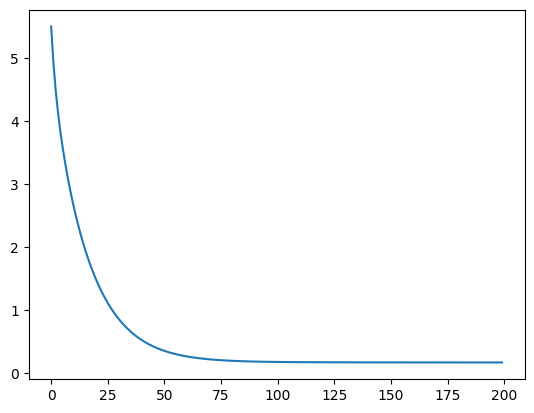

In [ ]:
cur_W1 = W1.copy()
cur_b1 = b1.copy()
cur_W2 = W2.copy()
cur_b2 = b2

losses = []
for epoch in tqdm(range(200)):
  Z, Ypred = forward(X, cur_W1, cur_b1, cur_W2, cur_b2)
  loss = calc_loss(Y, Ypred)
  losses.append(loss)
  cur_W1, cur_b1, cur_W2, cur_b2 = update(X, Z, Y, Ypred, cur_W1, cur_b1, cur_W2, cur_b2)

plt.plot(losses)
plt.show()

### MiniPyTorch

#### Базовые классы

In [ ]:
class Parameter:
    def __init__(self, data):
        self.data = data
        self.grad = np.zeros_like(data)

class Module:
    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

    def forward(self, *args, **kwargs):
        raise NotImplementedError()

    def backward(self, *args, **kwargs):
        raise NotImplementedError()

    def parameters(self):
        return []

#### Линейный слой

In [ ]:
class Linear(Module):
    def __init__(self, in_features, out_features, bias=True):
        super(Linear, self).__init__()
        self.weight = Parameter(np.random.randn(out_features, in_features) * np.sqrt(2 / in_features))
        if bias:
            self.bias = Parameter(np.zeros(out_features))
        self.cached_x = None

    def forward(self, x):
        self.cached_x = x
        out = x @ self.weight.data.T
        if self.bias is not None:
            out += self.bias.data
        return out

    def backward(self, grad):
        # grad - это dLoss/dLinear
        # на выход мы должны выдать dLoss/dCachedX
        # При этом мы должны запомнить у себя dLoss/dW и dL/db
        self.weight.grad += grad.T @ self.cached_x
        if self.bias is not None:
            self.bias.grad += grad.sum(axis=0)
        return grad @ self.weight.data

    def parameters(self):
        params = [self.weight]
        if self.bias is not None:
            params.append(self.bias)
        return params

#### Функция активация ReLU

In [ ]:
class ReLU(Module):
    def __init__(self):
        super(ReLU, self).__init__()
        self.cached_mask = None

    def forward(self, x):
        self.cached_mask = x > 0
        # return x.clip(min=0, max=None)
        return x * self.cached_mask

    def backward(self, grad):
        # return np.where(self.cached_mask, grad, 0)
        return grad * self.cached_mask

#### Функция потери MSELoss

In [ ]:
class MSELoss(Module):
    def __init__(self):
        super(MSELoss, self).__init__()
        self.cached_input = None
        self.cached_target = None

    def forward(self, x, target):
        self.cached_input = x
        self.cached_target = target
        out = (target - x) ** 2
        return out.mean()

    def backward(self):
        out = 2 * (self.cached_input - self.cached_target)
        return out / self.cached_input.size

#### Обучение

In [ ]:
np.random.seed(1)
linear1 = Linear(D, M)
relu = ReLU()
linear2 = Linear(M, 1)
criterion = MSELoss()

In [ ]:
def predict(x):
  out = linear1(x)
  out = relu(out)
  out = linear2(out)
  return out

In [ ]:
(500, 2) * (2, 100) + (1, 100) -> * (100, 1) + (1,1) -> (500, 1)

In [ ]:
predict(X).shape

(500, 1)

In [ ]:
def optimize(modules, learning_rate):
  for module in modules:
    for p in module.parameters():
      p.data -= learning_rate * p.grad

def zero_grad(modules):
  for module in modules:
    for p in module.parameters():
      p.grad *= 0

def train(num_epochs=200, learning_rate=5e-3):
  losses = []
  for epoch in tqdm(range(num_epochs)):
    Ypred = predict(X).squeeze()
    loss = criterion(Ypred, Y)
    losses.append(loss)

    grad = criterion.backward()
    grad = linear2.backward(grad[:, None])
    grad = relu.backward(grad)
    grad = linear1.backward(grad)

    optimize([linear1, relu, linear2], learning_rate)
    zero_grad([linear1, relu, linear2])

  plt.plot(losses)
  plt.show()

100%|██████████| 200/200 [00:00<00:00, 744.75it/s]


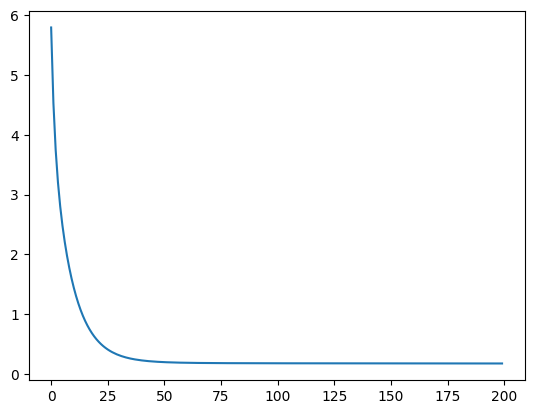

In [ ]:
train(200, 5e-3)

#### Модуль последовательных вычислений

In [ ]:
class Sequential(Module):
    def __init__(self, *layers):
        super().__init__()
        self.layers = layers

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def backward(self, grad):
        for i in range(len(self.layers) - 1, -1, -1):
            grad = self.layers[i].backward(grad)

    def parameters(self):
        res = []
        for layer in self.layers:
            res.extend(layer.parameters())
        return res

#### Агрегатор нейронной сети и функции потери

In [ ]:
class Net(Module):
    def __init__(self, module: Module, criterion: Module):
        super().__init__()
        self.module = module
        self.criterion = criterion

    def forward(self, x):
        return self.module(x)

    def loss(self, *args):
        return self.criterion(*args)

    def backward(self):
        grad = self.criterion.backward()
        return self.module.backward(grad)

    def parameters(self):
        return self.module.parameters()

#### SGD оптимизатор

In [ ]:
class Optimizer:
    def __init__(self, optim_params, lr):
        self.optim_params = optim_params
        self.lr = lr

    def step(self):
        for param in self.optim_params:
            step = self.get_grad_step(param.grad)
            param.data -= step

    def get_grad_step(self, grad):
        raise NotImplementedError()

    def zero_grad(self):
        for param in self.optim_params:
            param.grad *= 0

class SGD(Optimizer):
    def get_grad_step(self, grad):
        return self.lr * grad

#### И опять возьмемся за обучение

In [ ]:
def train_loop(net, optimizer, num_epochs=200, learning_rate=5e-3):
  losses = []
  for epoch in tqdm(range(num_epochs)):
    Ypred = net.forward(X)

    loss = net.loss(Ypred, Y[:, None])
    losses.append(loss)

    net.backward()

    optimizer.step()
    optimizer.zero_grad()

  plt.plot(losses)
  plt.show()

100%|██████████| 200/200 [00:00<00:00, 772.65it/s]


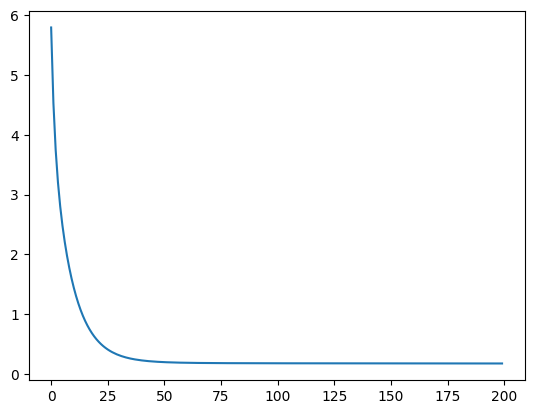

In [ ]:
np.random.seed(1)

seq_module = Sequential(Linear(D, M), ReLU(), Linear(M, 1))
criterion = MSELoss()

net = Net(seq_module, criterion)
optimizer = SGD(net.parameters(), lr=5e-3)

train_loop(net, optimizer)

##### Проверка работоспособности линейных слоёв

In [ ]:
in_features = 2
out_features = 4
linear = Linear(in_features, out_features)
linear.weight = Parameter(np.arange(out_features * in_features, dtype=np.float64).reshape(out_features, in_features))
print(linear.weight.data.T)
print(linear.weight.grad.T)

[[0. 2. 4. 6.]
 [1. 3. 5. 7.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
X_shape = (3, 2)

In [ ]:
x = np.arange(np.prod(X_shape), dtype=np.float64).reshape(X_shape)
print(x)
res = linear(x)
res

[[0. 1.]
 [2. 3.]
 [4. 5.]]


array([[ 1.,  3.,  5.,  7.],
       [ 3., 13., 23., 33.],
       [ 5., 23., 41., 59.]])

In [ ]:
backward_shape = (X_shape[0], out_features)

In [ ]:
back_grad = np.arange(np.prod(backward_shape), dtype=np.float64).reshape(backward_shape)
back_grad

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [ ]:
back_grad @ linear.weight.data

array([[ 28.,  34.],
       [ 76.,  98.],
       [124., 162.]])

In [ ]:
x.T @ back_grad

array([[40., 46., 52., 58.],
       [52., 61., 70., 79.]])

In [ ]:
linear.backward(back_grad)

array([[ 28.,  34.],
       [ 76.,  98.],
       [124., 162.]])

In [ ]:
print(linear.weight.grad.T)

[[40. 46. 52. 58.]
 [52. 61. 70. 79.]]


#### Основные минусы текущей реализации

1. Слои нельзя вызывать несколько раз до вызова backward, т.к. их кеши будут перезатираться.
2. Слои отвечают за вычисление производной, хотя хочется иметь способ считать производные для любых переменных (в том числе входных).
3. Нужно руками писать реализации backward'ов, т.к. нет автоматического дифференцирования.
4. Всё считается только на CPU, это очень долго. На GPU сейчас считать невозможно.


#### Контрольный вопрос
Подсчитайте кол-во весов (оптимизируемых параметров) в каждом модуле.